In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from pandas_datareader import wb  
import pandas_datareader.data as dtr
import datetime as dt
from pandas_datareader import data
import seaborn as sn
import yfinance as yfin

In [9]:
# create a set of stocks the data of which 
# this is created as a dictionary  tick_symbol  -- company


ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               }

In [10]:
# we may now run through all tick_symbols by running along the dictionary

for tick in ticker_list:
    print(tick)   # this will produce the tick_symbols
    

INTC
MSFT
IBM
BHP
TM
AAPL
AMZN
BA
QCOM
KO
GOOG


In [4]:


for tick in ticker_list:
    print(ticker_list[tick])   # this will print the company names



Intel
Microsoft
IBM
BHP
Toyota
Apple
Amazon
Boeing
Qualcomm
Coca-Cola
Google
PetroChina


In [5]:
 """
    This function reads in price data from Yahoo
    for each tick in the ticker_list and returns close prices
    for them
    """


def read_data_close(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
  
    ticker = pd.DataFrame()      # initialize the data frame

    for tick in ticker_list:
        yfin.pdr_override()
        prices = dtr.get_data_yahoo(tick,start,end)
        #prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker


In [11]:
ticker_close = read_data_close(ticker_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
ticker_close

INTC        MSFT         IBM        BHP          TM  \
Date                                                                   
2019-01-02  47.080002  101.120003  110.143402  42.694023  116.279999   
2019-01-03  44.490002   97.400002  107.944550  41.382694  114.650002   
2019-01-04  47.220001  101.930000  112.160614  43.907227  119.730003   
2019-01-07  47.439999  102.059998  112.954109  44.139160  121.279999   
2019-01-08  47.740002  102.800003  114.560226  44.005352  122.309998   
...               ...         ...         ...        ...         ...   
2019-12-23  59.230000  157.410004  129.588913  48.635147  141.960007   
2019-12-24  59.410000  157.380005  129.043976  48.581623  141.339996   
2019-12-26  59.820000  158.669998  128.977051  48.893845  141.529999   
2019-12-27  60.080002  158.960007  129.321228  49.000893  141.279999   
2019-12-30  59.619999  157.589996  126.969406  48.813560  140.610001   

                 AAPL       AMZN          BA       QCOM         KO       GOOG  
Date                                                                           
2019-01-02  39.480000  76.956497  323.809998  57.400002  46.930000  52.292500  
2019-01-03  35.547501  75.014000  310.899994  55.700001  46.639999  50.803001  
2019-01-04  37.064999  78.769501  327.079987  56.599998  47.570000  53.535500  
2019-01-07  36.982498  81.475502  328.109985  56.439999  46.950001  53.419498  
2019-01-08  37.687500  82.829002  340.529999  55.950001  47.480000  53.813999  
...               ...        ...         ...        ...        ...        ...  
2019-12-23  71.000000  89.650002  337.549988  88.449997  54.910000  67.442001  
2019-12-24  71.067497  89.460503  333.000000  88.769997  54.709999  67.178001  
2019-12-26  72.477501  93.438499  329.920013  88.400002  55.020000  68.019997  
2019-12-27  72.449997  93.489998  330.140015  88.800003  55.349998  67.594498  
2019-12-30  72.879997  92.344498  326.399994  88.430000  55.270000  66.806999  

[251 rows x 11 columns]

Μπορούμε να σώσουμε τα δεδομένα σε ενα csv αρχείο για να τα χρησιμοποιήσουμε αν θέλουμε αργότερα

In [13]:
ticker_close.to_csv(r'market_data.csv')

In [8]:
ticker_close_retrieve=pd.read_csv (r'market_data.csv')

In [9]:
ticker_close_retrieve

Date       INTC        MSFT         IBM        BHP          TM  \
0    2019-01-02  47.080002  101.120003  110.143402  47.860001  116.279999   
1    2019-01-03  44.490002   97.400002  107.944550  46.389999  114.650002   
2    2019-01-04  47.220001  101.930000  112.160614  49.220001  119.730003   
3    2019-01-07  47.439999  102.059998  112.954109  49.480000  121.279999   
4    2019-01-08  47.740002  102.800003  114.560226  49.330002  122.309998   
..          ...        ...         ...         ...        ...         ...   
247  2019-12-24  59.410000  157.380005  129.043976  54.459999  141.339996   
248  2019-12-26  59.820000  158.669998  128.977051  54.810001  141.529999   
249  2019-12-27  60.080002  158.960007  129.321228  54.930000  141.279999   
250  2019-12-30  59.619999  157.589996  126.969406  54.720001  140.610001   
251  2019-12-31  59.849998  157.699997  128.145309  54.709999  140.539993   

          AAPL         AMZN          BA       QCOM         KO         GOOG  \
0    39.480000  1539.130005  323.809998  57.400002  46.930000  1045.849976   
1    35.547501  1500.280029  310.899994  55.700001  46.639999  1016.059998   
2    37.064999  1575.390015  327.079987  56.599998  47.570000  1070.709961   
3    36.982498  1629.510010  328.109985  56.439999  46.950001  1068.390015   
4    37.687500  1656.579956  340.529999  55.950001  47.480000  1076.280029   
..         ...          ...         ...        ...        ...          ...   
247  71.067497  1789.209961  333.000000  88.769997  54.709999  1343.560059   
248  72.477501  1868.770020  329.920013  88.400002  55.020000  1360.400024   
249  72.449997  1869.800049  330.140015  88.800003  55.349998  1351.890015   
250  72.879997  1846.890015  326.399994  88.430000  55.270000  1336.140015   
251  73.412498  1847.839966  325.760010  88.230003  55.349998  1337.020020   

           PTR  
0    60.910000  
1    61.150002  
2    62.810001  
3    62.549999  
4    63.889999  
..         ...  
247  49.099998  
248  49.660000  
249  50.060001  
250  49.570000  
251  50.330002  

[252 rows x 13 columns]

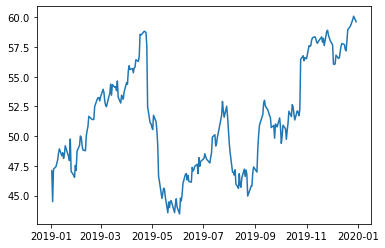

In [15]:
df=ticker_close
plt.plot(df['INTC'])

In [16]:
df=ticker_close
df_log=np.log(df)
df_log_ret=df_log.diff()  # log returns


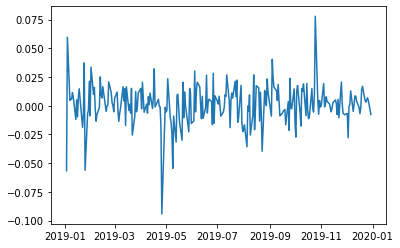

In [17]:
plt.plot(df_log_ret['INTC'])

In [18]:
# now get the covariance and the correlation matrix

cov_mat=df_log_ret.cov()

cor_mat=df_log_ret.corr()


In [13]:
cov_mat

INTC      MSFT       IBM       BHP        TM      AAPL      AMZN  \
INTC  0.000293  0.000111  0.000094  0.000093  0.000061  0.000158  0.000097   
MSFT  0.000111  0.000157  0.000086  0.000077  0.000050  0.000130  0.000131   
IBM   0.000094  0.000086  0.000169  0.000073  0.000036  0.000099  0.000084   
BHP   0.000093  0.000077  0.000073  0.000189  0.000051  0.000107  0.000090   
TM    0.000061  0.000050  0.000036  0.000051  0.000072  0.000058  0.000056   
AAPL  0.000158  0.000130  0.000099  0.000107  0.000058  0.000276  0.000142   
AMZN  0.000097  0.000131  0.000084  0.000090  0.000056  0.000142  0.000207   
BA    0.000090  0.000081  0.000062  0.000073  0.000049  0.000097  0.000074   
QCOM  0.000162  0.000100  0.000049  0.000071  0.000066  0.000159  0.000106   
KO    0.000020  0.000036  0.000025  0.000012  0.000018  0.000029  0.000030   
GOOG  0.000099  0.000120  0.000077  0.000083  0.000050  0.000142  0.000134   
PTR   0.000089  0.000062  0.000076  0.000109  0.000037  0.000094  0.000083   

            BA      QCOM            KO      GOOG           PTR  
INTC  0.000090  0.000162  1.953487e-05  0.000099  8.933986e-05  
MSFT  0.000081  0.000100  3.597723e-05  0.000120  6.248126e-05  
IBM   0.000062  0.000049  2.544753e-05  0.000077  7.632551e-05  
BHP   0.000073  0.000071  1.166617e-05  0.000083  1.088060e-04  
TM    0.000049  0.000066  1.807504e-05  0.000050  3.710002e-05  
AAPL  0.000097  0.000159  2.940190e-05  0.000142  9.356174e-05  
AMZN  0.000074  0.000106  2.975534e-05  0.000134  8.300966e-05  
BA    0.000335  0.000093  1.039587e-05  0.000068  6.709779e-05  
QCOM  0.000093  0.000587  5.067685e-06  0.000110  8.187208e-05  
KO    0.000010  0.000005  1.185152e-04  0.000034 -5.999777e-07  
GOOG  0.000068  0.000110  3.360816e-05  0.000230  7.433566e-05  
PTR   0.000067  0.000082 -5.999777e-07  0.000074  1.876910e-04

In [19]:
cor_mat

INTC      MSFT       IBM       BHP        TM      AAPL      AMZN  \
INTC  1.000000  0.514971  0.422680  0.396069  0.415917  0.553811  0.395689   
MSFT  0.514971  1.000000  0.530396  0.446125  0.470603  0.621747  0.724106   
IBM   0.422680  0.530396  1.000000  0.410674  0.323095  0.458343  0.448341   
BHP   0.396069  0.446125  0.410674  1.000000  0.439775  0.466974  0.455269   
TM    0.415917  0.470603  0.323095  0.439775  1.000000  0.412954  0.457885   
AAPL  0.553811  0.621747  0.458343  0.466974  0.412954  1.000000  0.592619   
AMZN  0.395689  0.724106  0.448341  0.455269  0.457885  0.592619  1.000000   
BA    0.285570  0.353392  0.259421  0.291692  0.312865  0.320398  0.282655   
QCOM  0.390958  0.327576  0.157404  0.211658  0.321129  0.395505  0.305049   
KO    0.104702  0.263435  0.179742  0.077929  0.195375  0.162396  0.190054   
GOOG  0.379529  0.630227  0.391861  0.398583  0.390171  0.561336  0.614331   

            BA      QCOM        KO      GOOG  
INTC  0.285570  0.390958  0.104702  0.379529  
MSFT  0.353392  0.327576  0.263435  0.630227  
IBM   0.259421  0.157404  0.179742  0.391861  
BHP   0.291692  0.211658  0.077929  0.398583  
TM    0.312865  0.321129  0.195375  0.390171  
AAPL  0.320398  0.395505  0.162396  0.561336  
AMZN  0.282655  0.305049  0.190054  0.614331  
BA    1.000000  0.208897  0.052176  0.245133  
QCOM  0.208897  1.000000  0.019262  0.300366  
KO    0.052176  0.019262  1.000000  0.203539  
GOOG  0.245133  0.300366  0.203539  1.000000

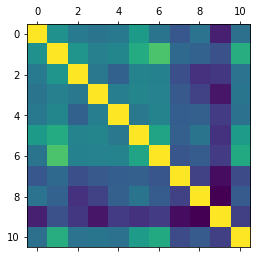

In [22]:
import matplotlib.pyplot as plt

plt.matshow(cor_mat)
plt.show()

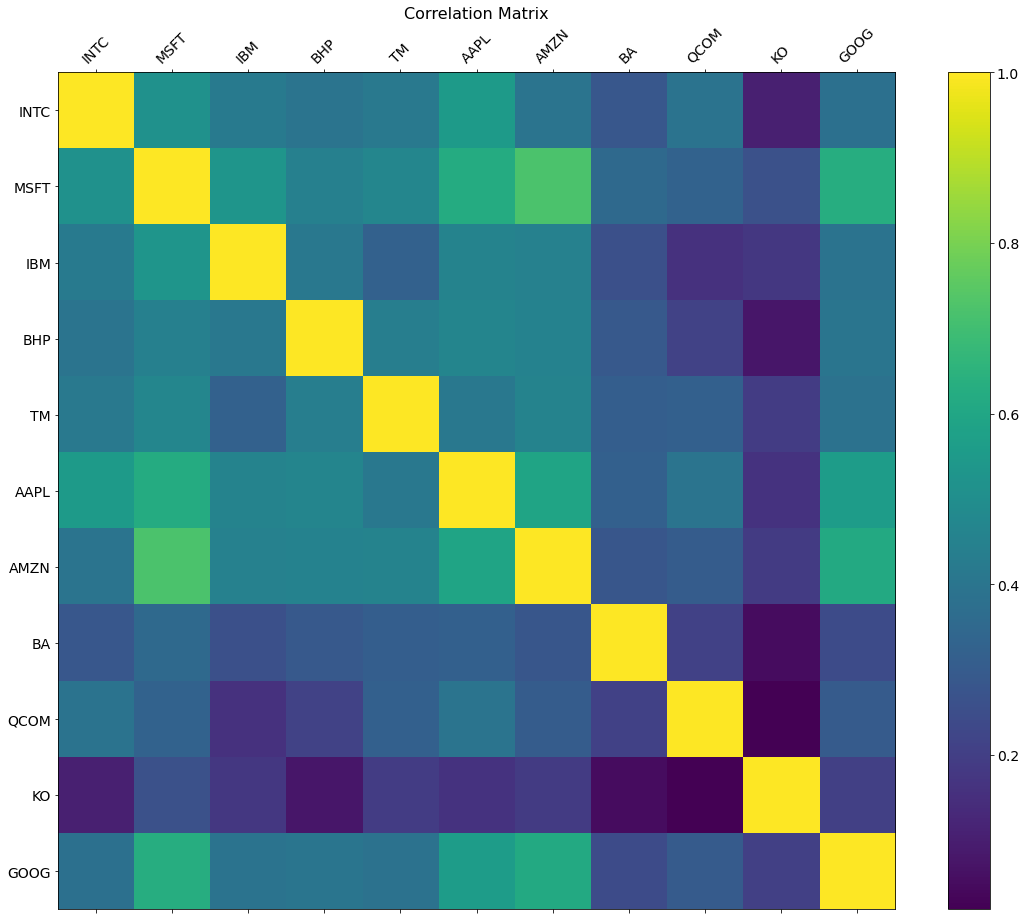

In [23]:
df=df_log_ret
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

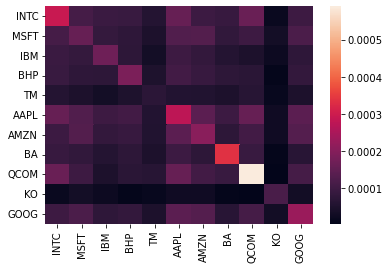

In [25]:
# visualize them using seaborn


sn.heatmap(cov_mat, annot=False, fmt='g')  # select False for large matrices
plt.show()

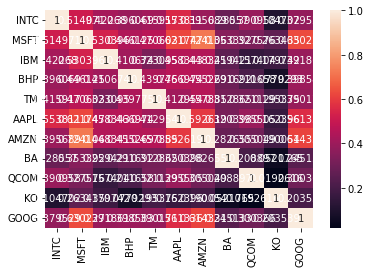

In [26]:
sn.heatmap(cor_mat, annot=True, fmt='g')  #  select falce for large matrices
plt.show()


<AxesSubplot:>

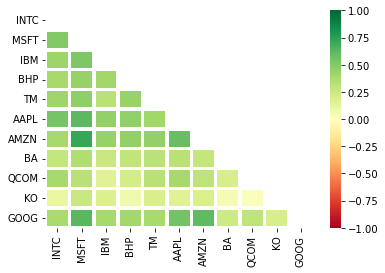

In [27]:
# different plot keeping only the lower triangular part


mask = np.zeros_like(cor_mat)

mask[np.triu_indices_from(mask)] = True

#generate plot

sn.heatmap(cor_mat, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)


In [28]:
rets=df_log_ret*252   # rename the log returns data

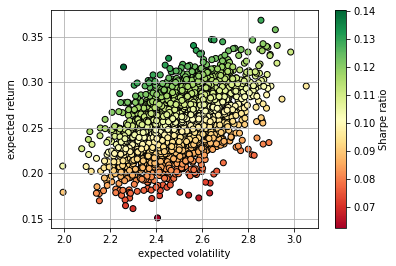

In [30]:
N_assets=11

N_sim=2500

p_ret=np.zeros(N_sim)
p_var=np.zeros(N_sim)
for p in range(N_sim):
    weights=np.random.random(N_assets)
    weights/=np.sum(weights)     # redefine and normalize
    p_ret[p]=np.sum(rets.mean() * weights) 
    p_var[p]=np.sqrt(np.dot(weights.T,
              np.dot(rets.cov() , weights)))
     
    
 # draw a simulation of the efficient frontier
# draw each portfolio as a point in ret-var space
# colorbar using the sharpe ratio   
    
#plt.style.use('seaborn')
#plt.figure(figsize=(8, 4))
plt.scatter(p_var, p_ret, c=p_ret / p_var, marker='o',cmap='RdYlGn', edgecolors='black')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')


In [21]:
cov_mat

INTC      MSFT       IBM       BHP        TM      AAPL      AMZN  \
INTC  0.000293  0.000111  0.000094  0.000093  0.000061  0.000158  0.000097   
MSFT  0.000111  0.000157  0.000086  0.000077  0.000050  0.000130  0.000131   
IBM   0.000094  0.000086  0.000169  0.000073  0.000036  0.000099  0.000084   
BHP   0.000093  0.000077  0.000073  0.000189  0.000051  0.000107  0.000090   
TM    0.000061  0.000050  0.000036  0.000051  0.000072  0.000058  0.000056   
AAPL  0.000158  0.000130  0.000099  0.000107  0.000058  0.000276  0.000142   
AMZN  0.000097  0.000131  0.000084  0.000090  0.000056  0.000142  0.000207   
BA    0.000090  0.000081  0.000062  0.000073  0.000049  0.000097  0.000074   
QCOM  0.000162  0.000100  0.000049  0.000071  0.000066  0.000159  0.000106   
KO    0.000020  0.000036  0.000025  0.000012  0.000018  0.000029  0.000030   
GOOG  0.000099  0.000120  0.000077  0.000083  0.000050  0.000142  0.000134   
PTR   0.000089  0.000062  0.000076  0.000109  0.000037  0.000094  0.000083   

            BA      QCOM            KO      GOOG           PTR  
INTC  0.000090  0.000162  1.953487e-05  0.000099  8.933986e-05  
MSFT  0.000081  0.000100  3.597723e-05  0.000120  6.248126e-05  
IBM   0.000062  0.000049  2.544753e-05  0.000077  7.632551e-05  
BHP   0.000073  0.000071  1.166617e-05  0.000083  1.088060e-04  
TM    0.000049  0.000066  1.807504e-05  0.000050  3.710002e-05  
AAPL  0.000097  0.000159  2.940190e-05  0.000142  9.356174e-05  
AMZN  0.000074  0.000106  2.975530e-05  0.000134  8.300962e-05  
BA    0.000335  0.000093  1.039587e-05  0.000068  6.709779e-05  
QCOM  0.000093  0.000587  5.067685e-06  0.000110  8.187208e-05  
KO    0.000010  0.000005  1.185152e-04  0.000034 -5.999777e-07  
GOOG  0.000068  0.000110  3.360816e-05  0.000230  7.433566e-05  
PTR   0.000067  0.000082 -5.999777e-07  0.000074  1.876910e-04

In [22]:
len(cov_mat)

12

In [23]:
cov_mat_array=np.asarray(cov_mat)

In [24]:
np.asarray(cov_mat)

array([[ 2.93484974e-04,  1.10666055e-04,  9.41647836e-05,
         9.33105794e-05,  6.05470198e-05,  1.57752734e-04,
         9.74822224e-05,  8.95643722e-05,  1.62213820e-04,
         1.95348666e-05,  9.86110137e-05,  8.93398590e-05],
       [ 1.10666055e-04,  1.57411905e-04,  8.64118322e-05,
         7.69868559e-05,  5.01922523e-05,  1.29643176e-04,
         1.30656779e-04,  8.12047501e-05,  9.95892702e-05,
         3.59772272e-05,  1.19934108e-04,  6.24812585e-05],
       [ 9.41647836e-05,  8.64118322e-05,  1.69067592e-04,
         7.33545886e-05,  3.56346274e-05,  9.91424999e-05,
         8.37589397e-05,  6.16502047e-05,  4.94048409e-05,
         2.54475333e-05,  7.72049032e-05,  7.63255129e-05],
       [ 9.33105794e-05,  7.69868559e-05,  7.33545886e-05,
         1.89175790e-04,  5.14178653e-05,  1.06747976e-04,
         9.00566428e-05,  7.34775061e-05,  7.05421477e-05,
         1.16661740e-05,  8.31538097e-05,  1.08805970e-04],
       [ 6.05470198e-05,  5.01922523e-05,  3.5634627

In [25]:
cov_mat_array[1,1]

0.00015741190530898065

Θα χρησιμοποιήσουμε τώρα τα παραπάνω δεδομένα για την παραγωγή περαιτέρω δειγμάτων μέσω προσομοίωσης υποθέτωντας οτι 
η απο κοινού κατανομή των αποδοσεων για τις παραπάνω μετοχές είναι η πολυμεταβλητή κανονική κατανομή

In [31]:
def my_normal():
    # box muller
    u1=np.random.uniform()
    u2=np.random.uniform()
    r=-2*np.log(u1)
    x1=(r**(0.5))*np.cos(2*np.pi*u2)
    x2=(r**(0.5))*np.sin(2*np.pi*u2)
    return x1, x2

def my_normal_sample(n):
    sample=np.zeros(n)
    for i in range(n):
        x1, x2=my_normal()
        sample[i]=x1
    return sample


def my_multivariate_normal(mu,S):
    n_d=len(S)                            # dimension of the random vector
    A = np.linalg.cholesky(S)            # generate Cholesky decomposition for A
    sample=my_normal_sample(n_d)
    z=sample.T
    x=mu+np.dot(A,z)
    #x1=mu+np.dot(A,sample)   # np.dot is insensitive to A z or A z'
    return x

def my_multivariate_normal_test(mu,S):
    n_d=len(S)                            # dimension of the random vector
    A = np.linalg.cholesky(S)            # generate Cholesky decomposition for A
    sample=my_normal_sample(n_d)
    z=sample.T
    x=mu+np.dot(A,z)
    x1=mu+np.dot(A,sample)   # np.dot is insensitive to A z or A z'
    return x, x1

def my_multivariate_normal_sample(mu,S,n):
    n_d=len(S)
    sample=np.zeros((n,n_d))
    for i in range(n):
        x=my_multivariate_normal(mu,S)
        sample[i, :]=x
    return sample


In [32]:
mean_return=df_log_ret.mean()
cov_mat=df_log_ret.cov()

In [33]:
mean_return

INTC    0.000945
MSFT    0.001775
IBM     0.000569
BHP     0.000536
TM      0.000760
AAPL    0.002452
AMZN    0.000729
BA      0.000032
QCOM    0.001729
KO      0.000654
GOOG    0.000980
dtype: float64

In [29]:
cov_mat

INTC      MSFT       IBM       BHP        TM      AAPL      AMZN  \
INTC  0.000293  0.000111  0.000094  0.000093  0.000061  0.000158  0.000097   
MSFT  0.000111  0.000157  0.000086  0.000077  0.000050  0.000130  0.000131   
IBM   0.000094  0.000086  0.000169  0.000073  0.000036  0.000099  0.000084   
BHP   0.000093  0.000077  0.000073  0.000189  0.000051  0.000107  0.000090   
TM    0.000061  0.000050  0.000036  0.000051  0.000072  0.000058  0.000056   
AAPL  0.000158  0.000130  0.000099  0.000107  0.000058  0.000276  0.000142   
AMZN  0.000097  0.000131  0.000084  0.000090  0.000056  0.000142  0.000207   
BA    0.000090  0.000081  0.000062  0.000073  0.000049  0.000097  0.000074   
QCOM  0.000162  0.000100  0.000049  0.000071  0.000066  0.000159  0.000106   
KO    0.000020  0.000036  0.000025  0.000012  0.000018  0.000029  0.000030   
GOOG  0.000099  0.000120  0.000077  0.000083  0.000050  0.000142  0.000134   
PTR   0.000089  0.000062  0.000076  0.000109  0.000037  0.000094  0.000083   

            BA      QCOM            KO      GOOG           PTR  
INTC  0.000090  0.000162  1.953487e-05  0.000099  8.933986e-05  
MSFT  0.000081  0.000100  3.597723e-05  0.000120  6.248126e-05  
IBM   0.000062  0.000049  2.544753e-05  0.000077  7.632551e-05  
BHP   0.000073  0.000071  1.166617e-05  0.000083  1.088060e-04  
TM    0.000049  0.000066  1.807504e-05  0.000050  3.710002e-05  
AAPL  0.000097  0.000159  2.940190e-05  0.000142  9.356174e-05  
AMZN  0.000074  0.000106  2.975530e-05  0.000134  8.300962e-05  
BA    0.000335  0.000093  1.039587e-05  0.000068  6.709779e-05  
QCOM  0.000093  0.000587  5.067685e-06  0.000110  8.187208e-05  
KO    0.000010  0.000005  1.185152e-04  0.000034 -5.999777e-07  
GOOG  0.000068  0.000110  3.360816e-05  0.000230  7.433566e-05  
PTR   0.000067  0.000082 -5.999777e-07  0.000074  1.876910e-04

Θα τα μετατρέψουμε τώρα τα παραπάνω σε numpy arrays για να μπορέσουμε να τα χρησιμοποιήσουμε στην γεννήτρια τυχαίων διανυσμάτων απο την πολυμεταβλητή κανονική

In [34]:
mean_return_array=np.asarray(mean_return)
cov_mat_array=np.asarray(cov_mat)

In [35]:
mean_return

INTC    0.000945
MSFT    0.001775
IBM     0.000569
BHP     0.000536
TM      0.000760
AAPL    0.002452
AMZN    0.000729
BA      0.000032
QCOM    0.001729
KO      0.000654
GOOG    0.000980
dtype: float64

In [31]:
mean_return_array

array([ 9.56147750e-04,  1.77046421e-03,  6.03114254e-04,  5.32933849e-04,
        7.54944354e-04,  2.47131473e-03,  7.28287194e-04,  2.39204279e-05,
        1.71275996e-03,  6.57448188e-04,  9.78539215e-04, -7.60143447e-04])

In [36]:
cov_mat

INTC      MSFT       IBM       BHP        TM      AAPL      AMZN  \
INTC  0.000295  0.000111  0.000094  0.000094  0.000061  0.000158  0.000098   
MSFT  0.000111  0.000158  0.000087  0.000077  0.000050  0.000130  0.000131   
IBM   0.000094  0.000087  0.000169  0.000074  0.000036  0.000099  0.000084   
BHP   0.000094  0.000077  0.000074  0.000190  0.000052  0.000107  0.000090   
TM    0.000061  0.000050  0.000036  0.000052  0.000073  0.000059  0.000056   
AAPL  0.000158  0.000130  0.000099  0.000107  0.000059  0.000277  0.000142   
AMZN  0.000098  0.000131  0.000084  0.000090  0.000056  0.000142  0.000208   
BA    0.000090  0.000082  0.000062  0.000074  0.000049  0.000098  0.000075   
QCOM  0.000163  0.000100  0.000050  0.000071  0.000066  0.000160  0.000107   
KO    0.000020  0.000036  0.000026  0.000012  0.000018  0.000030  0.000030   
GOOG  0.000099  0.000120  0.000078  0.000083  0.000051  0.000142  0.000135   

            BA      QCOM        KO      GOOG  
INTC  0.000090  0.000163  0.000020  0.000099  
MSFT  0.000082  0.000100  0.000036  0.000120  
IBM   0.000062  0.000050  0.000026  0.000078  
BHP   0.000074  0.000071  0.000012  0.000083  
TM    0.000049  0.000066  0.000018  0.000051  
AAPL  0.000098  0.000160  0.000030  0.000142  
AMZN  0.000075  0.000107  0.000030  0.000135  
BA    0.000337  0.000093  0.000010  0.000068  
QCOM  0.000093  0.000589  0.000005  0.000111  
KO    0.000010  0.000005  0.000119  0.000034  
GOOG  0.000068  0.000111  0.000034  0.000231

In [33]:
cov_mat_array

array([[ 2.93484974e-04,  1.10666055e-04,  9.41647836e-05,
         9.33105794e-05,  6.05470198e-05,  1.57752734e-04,
         9.74822224e-05,  8.95643722e-05,  1.62213820e-04,
         1.95348666e-05,  9.86110137e-05,  8.93398590e-05],
       [ 1.10666055e-04,  1.57411905e-04,  8.64118322e-05,
         7.69868559e-05,  5.01922523e-05,  1.29643176e-04,
         1.30656779e-04,  8.12047501e-05,  9.95892702e-05,
         3.59772272e-05,  1.19934108e-04,  6.24812585e-05],
       [ 9.41647836e-05,  8.64118322e-05,  1.69067592e-04,
         7.33545886e-05,  3.56346274e-05,  9.91424999e-05,
         8.37589397e-05,  6.16502047e-05,  4.94048409e-05,
         2.54475333e-05,  7.72049032e-05,  7.63255129e-05],
       [ 9.33105794e-05,  7.69868559e-05,  7.33545886e-05,
         1.89175790e-04,  5.14178653e-05,  1.06747976e-04,
         9.00566428e-05,  7.34775061e-05,  7.05421477e-05,
         1.16661740e-05,  8.31538097e-05,  1.08805970e-04],
       [ 6.05470198e-05,  5.01922523e-05,  3.5634627

In [37]:
mu=mean_return_array
S=cov_mat_array
n=5
my_multivariate_normal_sample(mu,S,n)

array([[ 0.02319808,  0.02014127,  0.00722286, -0.00476803, -0.00013037,
         0.00814825,  0.02187229,  0.01742962,  0.02292919, -0.00219287,
        -0.00505019],
       [-0.01726127, -0.01783549,  0.01404906, -0.03381487, -0.00874349,
         0.00319466, -0.02169743, -0.00728565, -0.04885411, -0.00301287,
        -0.00825634],
       [-0.00634741, -0.00407173,  0.00718066,  0.00557341, -0.00659836,
         0.02366924, -0.00209205,  0.01749808,  0.01908086, -0.01625427,
         0.00029869],
       [-0.00615252,  0.0091877 ,  0.00243179,  0.00720575,  0.00522727,
         0.02353042,  0.01186418,  0.03309257, -0.00949709,  0.00866084,
         0.00910075],
       [-0.01197461,  0.00132102,  0.00467553,  0.01410506, -0.01051576,
         0.00138339,  0.00804784, -0.01447018,  0.01378517, -0.01491662,
         0.00976056]])

Ο επενδυτικός σύμβουλος της εταιρείας σας προτείνει να τοποθετηθείτε σε ένα πλήρως διαφοροποιημένο χαρτοφυλάκιο στις μετοχές αυτές. 

Ο υπεύθυνος του τμήματος σας, έχει τις αμφιβολίες του και σας ρωτάει την γνώμη σας επ' αυτού

Θα θέλατε να έχετε μια αίσθηση της απόδοσης αυτού του χαρτοφυλακίου καθώς και του κινδύνου απο αυτό.

Ενας τρόπος είναι να προσομοιώσετε αποδόσεις απο αυτή την αγορά, μετά να προσομοιώσετε αποδόσεις απο το συγκεκριμένο χαρτοφυλάκιο και να συνάγετε απο την εμπειρική κατανομή των αποδόσεων του χαρτοφυλακίου αυτού την συμπεριφορά του

In [35]:
sample_0=my_multivariate_normal_sample(mu,S,n)

In [37]:
sample_0[0,:]   # αυτό είναι ένα τυχαίο διάνυσμα απο αποδόσεις της αγοράς

array([ 0.0025921 , -0.00399127, -0.00597955, -0.00524952,  0.00134648,
       -0.00203433, -0.02301642, -0.02167112, -0.05967959, -0.01173034,
       -0.02743146, -0.00280538])

In [36]:
(1/len(S))*np.ones(len(S))

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [37]:
market_return_sample=my_multivariate_normal_sample(mu,S,1000)
w=(1/len(S))*np.ones(len(S))
portfolio_return_sample=np.zeros(1000)
for i in range(1000):
    portfolio_return_sample[i]=np.dot(w,market_return_sample[i,:])
    

(array([ 25.,  81., 158., 248., 237., 164.,  71.,  13.,   1.,   2.]),
 array([-0.02283218, -0.01681118, -0.01079017, -0.00476916,  0.00125185,
         0.00727286,  0.01329386,  0.01931487,  0.02533588,  0.03135689,
         0.0373779 ]),
 <BarContainer object of 10 artists>)

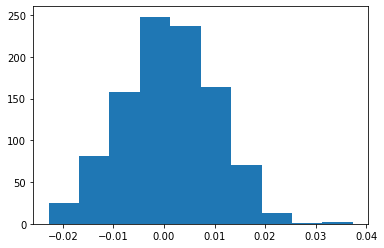

In [38]:
plt.hist(portfolio_return_sample)

In [39]:
portfolio_return_sample.mean()

0.0009427081767644573

In [40]:
portfolio_return_sample.var()

8.239290208314948e-05